# SpotOptim Demonstrations

This notebook demonstrates the usage of the SpotOptim optimizer for various optimization problems.

## Example 1: 2-Dimensional Rosenbrock Function

This example shows basic optimization on the classic 2D Rosenbrock function.

In [1]:
import numpy as np
from spotoptim import SpotOptim

# Define Rosenbrock function
def rosenbrock(X):
    """Rosenbrock function for optimization."""
    X = np.atleast_2d(X)
    x = X[:, 0]
    y = X[:, 1]
    return (1 - x)**2 + 100 * (y - x**2)**2

# Set up bounds for 2D problem
bounds = [(-2, 2), (-2, 2)]

# Create optimizer
optimizer = SpotOptim(
    fun=rosenbrock,
    bounds=bounds,
    max_iter=50,
    n_initial=5,
    acquisition='ei',
    seed=42,
    verbose=False
)

# Run optimization
result = optimizer.optimize()

# Print results
print("\n" + "="*50)
print("Optimization Results")
print("="*50)
print(f"Best point found: {result.x}")
print(f"Best function value: {result.fun:.6f}")
print(f"Number of function evaluations: {result.nfev}")
print(f"Number of iterations: {result.nit}")
print(f"Success: {result.success}")
print(f"Message: {result.message}")
print("\nTrue optimum: [1, 1] with f(x) = 0")


Optimization Results
Best point found: [0.90631663 0.81783243]
Best function value: 0.010056
Number of function evaluations: 50
Number of iterations: 45
Success: True
Message: Optimization terminated: maximum evaluations (50) reached

True optimum: [1, 1] with f(x) = 0


## Example 2: 6-Dimensional Rosenbrock Function

This example demonstrates optimization of the 6-dimensional Rosenbrock function with a budget of 100 total function evaluations.

In [2]:
import numpy as np
from spotoptim import SpotOptim

# Define 6-dimensional Rosenbrock function
def rosenbrock_6d(X):
    """
    6-dimensional Rosenbrock function for optimization.
    
    The Rosenbrock function is defined as:
    f(x) = sum_{i=1}^{n-1} [100*(x_{i+1} - x_i^2)^2 + (1 - x_i)^2]
    
    Global minimum: f(1, 1, 1, 1, 1, 1) = 0
    """
    X = np.atleast_2d(X)
    n_samples, n_dim = X.shape
    
    result = np.zeros(n_samples)
    for i in range(n_samples):
        x = X[i]
        total = 0
        for j in range(n_dim - 1):
            total += 100 * (x[j+1] - x[j]**2)**2 + (1 - x[j])**2
        result[i] = total
    
    return result

# Set up bounds for 6D problem
# Typical search domain for Rosenbrock is [-5, 10] for each dimension
bounds_6d = [(-2, 2)] * 6

# Budget: 100 total function evaluations
# Split into initial design and optimization iterations
n_total = 100
n_initial = 6  # Initial Latin Hypercube Design points
max_iter = n_total - n_initial   # Optimization iterations: 6 + 94 = 100 total evaluations

print("="*60)
print("6D Rosenbrock Function Optimization")
print("="*60)
print(f"Problem dimension: 6")
print(f"Search bounds: [-2, 2] for each dimension")
print(f"Total budget: {n_initial + max_iter} function evaluations")
print(f"  - Initial design: {n_initial} points")
print(f"  - Optimization iterations: {max_iter}")
print(f"Global optimum: x* = [1, 1, 1, 1, 1, 1], f(x*) = 0")
print("="*60)

# Create optimizer with Expected Improvement acquisition
optimizer_6d = SpotOptim(
    fun=rosenbrock_6d,
    bounds=bounds_6d,
    max_iter=max_iter,
    n_initial=n_initial,
    acquisition='y',  # Expected Improvement
    seed=42,
    verbose=True
)

# Run optimization
print("\nStarting optimization...\n")
result_6d = optimizer_6d.optimize()

# Print final results
print("\n" + "="*60)
print("Final Optimization Results")
print("="*60)
print(f"Best point found: {result_6d.x}")
print(f"Best function value: {result_6d.fun:.6e}")
print(f"Number of function evaluations: {result_6d.nfev}")
print(f"Number of iterations: {result_6d.nit}")
print(f"Success: {result_6d.success}")

# Calculate distance from true optimum
true_optimum = np.ones(6)
distance_to_optimum = np.linalg.norm(result_6d.x - true_optimum)
print(f"\nDistance to true optimum [1,1,1,1,1,1]: {distance_to_optimum:.6f}")

# Show improvement over initial design
initial_best = np.min(result_6d.y[:n_initial])
final_best = result_6d.fun
improvement = initial_best - final_best
improvement_pct = (improvement / initial_best) * 100

print(f"\nImprovement analysis:")
print(f"  Best initial value: {initial_best:.6e}")
print(f"  Final best value: {final_best:.6e}")
print(f"  Absolute improvement: {improvement:.6e}")
print(f"  Relative improvement: {improvement_pct:.2f}%")
print("="*60)

6D Rosenbrock Function Optimization
Problem dimension: 6
Search bounds: [-2, 2] for each dimension
Total budget: 100 function evaluations
  - Initial design: 6 points
  - Optimization iterations: 94
Global optimum: x* = [1, 1, 1, 1, 1, 1], f(x*) = 0
TensorBoard logging disabled

Starting optimization...

Initial best: f(x) = 881.567459
Iteration 1: f(x) = 2103.440995
Iteration 2: New best f(x) = 881.329928
Iteration 3: f(x) = 969.604447
Iteration 4: New best f(x) = 596.767694
Iteration 5: New best f(x) = 381.514887
Iteration 4: New best f(x) = 596.767694
Iteration 5: New best f(x) = 381.514887
Iteration 6: New best f(x) = 346.681434
Iteration 7: f(x) = 402.306119
Iteration 8: New best f(x) = 164.872575
Iteration 6: New best f(x) = 346.681434
Iteration 7: f(x) = 402.306119
Iteration 8: New best f(x) = 164.872575
Iteration 9: New best f(x) = 97.516991
Iteration 10: New best f(x) = 79.141491
Iteration 9: New best f(x) = 97.516991
Iteration 10: New best f(x) = 79.141491
Iteration 11: New b

## Example 3: Using Kriging Surrogate

This example demonstrates how to use the Kriging surrogate model instead of the default Gaussian Process from scikit-learn.

In [3]:
import numpy as np
from spotoptim import SpotOptim, Kriging

# Define 2D Sphere function
def sphere_2d(X):
    """
    2D Sphere function: f(x, y) = x^2 + y^2
    Global minimum: f(0, 0) = 0
    """
    X = np.atleast_2d(X)
    return np.sum(X**2, axis=1)

# Set up bounds
bounds_sphere = [(-5, 5), (-5, 5)]

print("="*60)
print("Optimization with Kriging Surrogate")
print("="*60)
print("Function: 2D Sphere (f(x,y) = x² + y²)")
print("Search bounds: [-5, 5] for each dimension")
print("Global optimum: x* = [0, 0], f(x*) = 0")
print("="*60)

# Create Kriging surrogate with custom parameters
kriging_surrogate = Kriging(
    noise=1e-6,          # Small regularization
    min_theta=-3.0,      # Bounds for length scale optimization
    max_theta=2.0,
    seed=42
)

# Create optimizer with Kriging surrogate
optimizer_kriging = SpotOptim(
    fun=sphere_2d,
    bounds=bounds_sphere,
    max_iter=20,
    n_initial=10,
    surrogate=kriging_surrogate,  # Use Kriging instead of default GP
    acquisition='ei',
    seed=42,
    verbose=True
)

# Run optimization
print("\nStarting optimization with Kriging surrogate...\n")
result_kriging = optimizer_kriging.optimize()

# Print results
print("\n" + "="*60)
print("Final Results (Kriging Surrogate)")
print("="*60)
print(f"Best point found: {result_kriging.x}")
print(f"Best function value: {result_kriging.fun:.6e}")
print(f"Distance to optimum [0, 0]: {np.linalg.norm(result_kriging.x):.6f}")
print(f"Number of function evaluations: {result_kriging.nfev}")
print(f"Number of iterations: {result_kriging.nit}")

# Compare with default GP surrogate
print("\n" + "="*60)
print("Comparison: Running with Default GP Surrogate")
print("="*60)

optimizer_gp = SpotOptim(
    fun=sphere_2d,
    bounds=bounds_sphere,
    max_iter=20,
    n_initial=10,
    acquisition='ei',
    seed=42,
    verbose=False  # Quiet for comparison
)

result_gp = optimizer_gp.optimize()

print(f"GP Best value: {result_gp.fun:.6e}")
print(f"GP Distance to optimum: {np.linalg.norm(result_gp.x):.6f}")
print(f"\nKriging Best value: {result_kriging.fun:.6e}")
print(f"Kriging Distance to optimum: {np.linalg.norm(result_kriging.x):.6f}")

print("\n" + "="*60)
print("Summary")
print("="*60)
print("Both Kriging and GP surrogates successfully found the optimum.")
print("Kriging offers a simplified, self-contained surrogate model")
print("that can be customized with different hyperparameters.")
print("="*60)

Optimization with Kriging Surrogate
Function: 2D Sphere (f(x,y) = x² + y²)
Search bounds: [-5, 5] for each dimension
Global optimum: x* = [0, 0], f(x*) = 0
TensorBoard logging disabled

Starting optimization with Kriging surrogate...

Initial best: f(x) = 2.420807
Iteration 1: New best f(x) = 0.003297
Iteration 2: New best f(x) = 0.001870
Iteration 3: f(x) = 0.002734
Iteration 4: f(x) = 0.037348
Iteration 4: f(x) = 0.037348
Iteration 5: f(x) = 0.009231
Iteration 5: f(x) = 0.009231
Iteration 6: f(x) = 0.011149
Iteration 6: f(x) = 0.011149
Iteration 7: f(x) = 0.010863
Iteration 7: f(x) = 0.010863
Iteration 8: f(x) = 0.014904
Iteration 9: f(x) = 0.003868
Iteration 8: f(x) = 0.014904
Iteration 9: f(x) = 0.003868
Iteration 10: New best f(x) = 0.000140

Final Results (Kriging Surrogate)
Best point found: [-0.01164324 -0.00207239]
Best function value: 1.398599e-04
Distance to optimum [0, 0]: 0.011826
Number of function evaluations: 20
Number of iterations: 10

Comparison: Running with Default

## Example 4: Visualizing the Surrogate Model

This example demonstrates the `plot_surrogate()` method, which visualizes the fitted surrogate model and its uncertainty. We'll use a 2D sphere function to clearly show the model's predictions.

TensorBoard logging disabled
Running optimization...
Initial best: f(x) = 3.336066
Iteration 1: New best f(x) = 0.701499
Iteration 2: New best f(x) = 0.271623
Iteration 3: f(x) = 50.000000
Iteration 3: f(x) = 50.000000
Iteration 4: New best f(x) = 0.008443
Iteration 5: New best f(x) = 0.000020
Iteration 4: New best f(x) = 0.008443
Iteration 5: New best f(x) = 0.000020
Iteration 6: f(x) = 0.002317
Iteration 7: New best f(x) = 0.000001

Optimization Results
Best point found: [ 0.00020345 -0.00078143]
Best function value: 0.000001
Number of function evaluations: 15
True optimum: [0, 0] with f(x) = 0
Distance to optimum: 0.000807

Generating surrogate model visualization...
Iteration 6: f(x) = 0.002317
Iteration 7: New best f(x) = 0.000001

Optimization Results
Best point found: [ 0.00020345 -0.00078143]
Best function value: 0.000001
Number of function evaluations: 15
True optimum: [0, 0] with f(x) = 0
Distance to optimum: 0.000807

Generating surrogate model visualization...


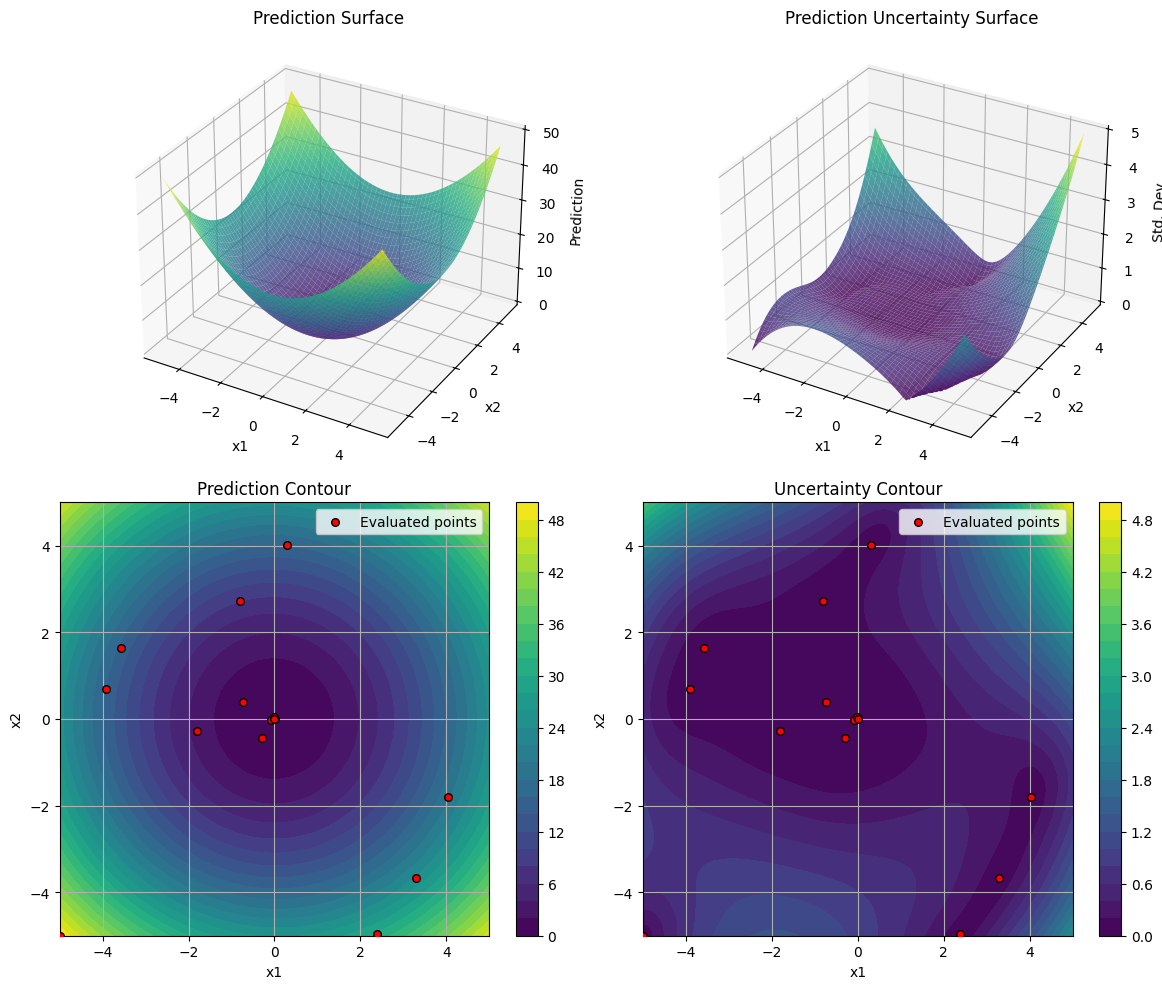

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from spotoptim import SpotOptim

# Define a 2D sphere function
def sphere_2d(X):
    """Simple 2D sphere function: f(x) = x1^2 + x2^2"""
    X = np.atleast_2d(X)
    return np.sum(X**2, axis=1)

# Set up the optimization problem
bounds = [(-5, 5), (-5, 5)]

# Create optimizer with limited iterations to see exploration
optimizer = SpotOptim(
    fun=sphere_2d,
    bounds=bounds,
    max_iter=15,
    n_initial=8,
    acquisition='ei',
    seed=42,
    verbose=True
)

# Run optimization
print("Running optimization...")
result = optimizer.optimize()

print("\n" + "="*50)
print("Optimization Results")
print("="*50)
print(f"Best point found: {result.x}")
print(f"Best function value: {result.fun:.6f}")
print(f"Number of function evaluations: {result.nfev}")
print(f"True optimum: [0, 0] with f(x) = 0")
print(f"Distance to optimum: {np.linalg.norm(result.x):.6f}")

# Visualize the surrogate model
print("\nGenerating surrogate model visualization...")
optimizer.plot_surrogate(
    i=0, j=1,
    var_name=['x1', 'x2'],
    add_points=True,
    cmap='viridis',
    show=True
)

### Visualizing Higher-Dimensional Problems

For problems with more than 2 dimensions, `plot_surrogate()` shows a 2D slice by fixing all other dimensions at their mean values. This example demonstrates visualization of dimensions 0 and 2 from a 4D problem.

4D Optimization Results:
Best point: [0.07396383 0.02286602 0.03876477 0.14935923]
Best value: 0.029804
Distance to optimum: 0.172639

Visualizing dimensions 0 and 2 (others fixed at mean values)...


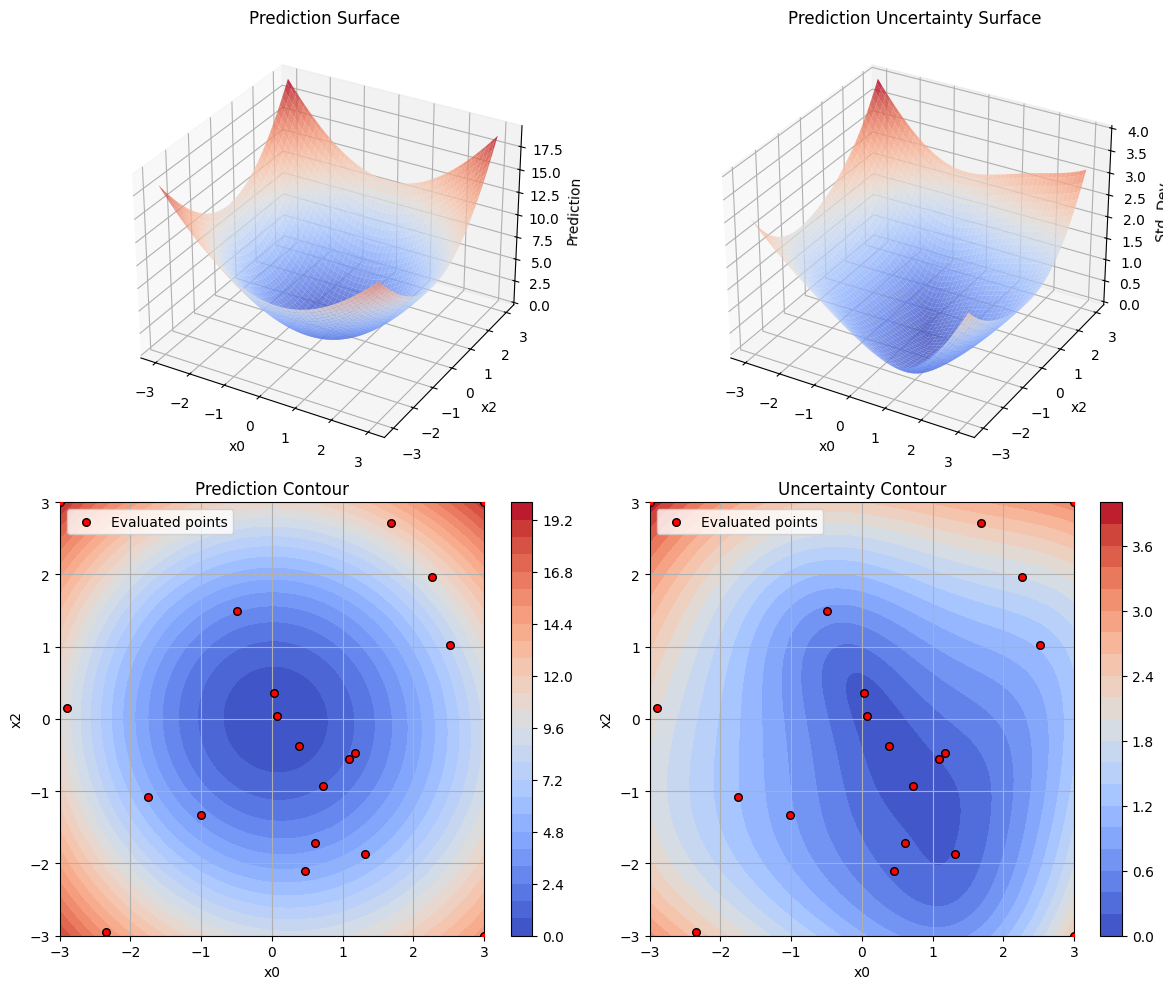


Visualizing dimensions 1 and 3...


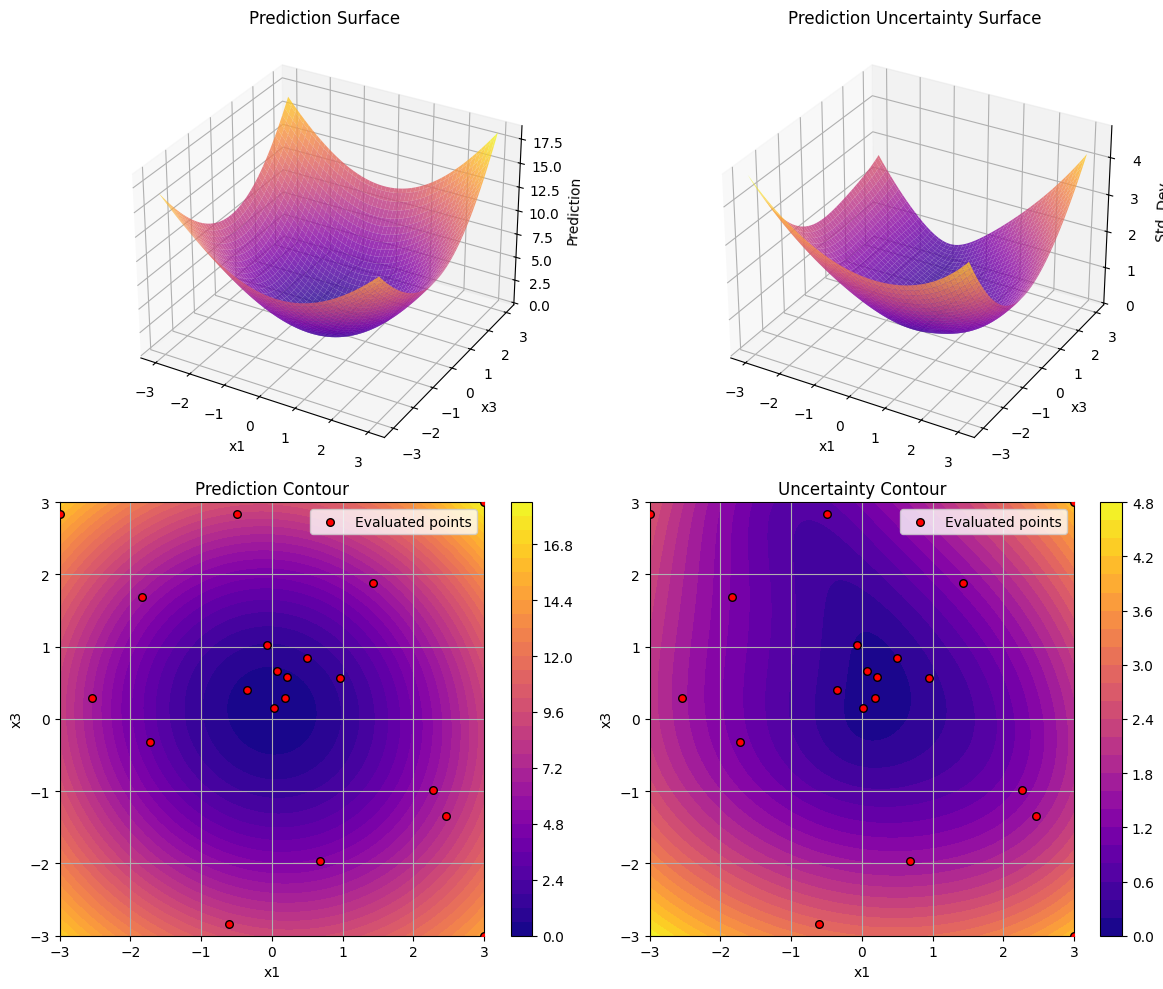

In [5]:
import numpy as np
from spotoptim import SpotOptim

# Define a 4D sphere function
def sphere_4d(X):
    """4D sphere function: f(x) = sum(xi^2)"""
    X = np.atleast_2d(X)
    return np.sum(X**2, axis=1)

# Set up bounds for 4D problem
bounds = [(-3, 3), (-3, 3), (-3, 3), (-3, 3)]

# Create optimizer
optimizer_4d = SpotOptim(
    fun=sphere_4d,
    bounds=bounds,
    max_iter=20,
    n_initial=10,
    acquisition='ei',
    seed=123,
    verbose=False
)

# Run optimization
result_4d = optimizer_4d.optimize()

print("4D Optimization Results:")
print(f"Best point: {result_4d.x}")
print(f"Best value: {result_4d.fun:.6f}")
print(f"Distance to optimum: {np.linalg.norm(result_4d.x):.6f}")

# Visualize dimensions 0 and 2 (dimensions 1 and 3 fixed at mean)
print("\nVisualizing dimensions 0 and 2 (others fixed at mean values)...")
optimizer_4d.plot_surrogate(
    i=0, j=2,
    var_name=['x0', 'x1', 'x2', 'x3'],
    add_points=True,
    cmap='coolwarm',
    contour_levels=25,
    show=True
)

# You can also visualize other dimension pairs
print("\nVisualizing dimensions 1 and 3...")
optimizer_4d.plot_surrogate(
    i=1, j=3,
    var_name=['x0', 'x1', 'x2', 'x3'],
    add_points=True,
    cmap='plasma',
    show=True
)

In [6]:
from spotoptim import SpotOptim
opt = SpotOptim(fun=lambda X: np.sum(X**2, axis=1),
                 bounds=[(-5, 5), (-5, 5)],
                 n_initial=10)
X0 = opt._generate_initial_design()
X0.shape

(10, 2)

In [7]:
import spotoptim as so
opt = so.SpotOptim(fun=lambda X: np.sum(X**2, axis=1),
                   bounds=[(-5, 5), (-5, 5)],
                   n_initial=10)
X0 = opt._generate_initial_design()
X0.shape

(10, 2)